In [1]:
import pickle as pkl
import pk_plot_library as pplib

pplib.imports()

In [19]:
ds = pkl.load(open('/Users/cosinga/code/hcolor/fig_md_analysis/11-20_pkdatasort.pkl', 'rb'))

ds.tickArgs(direction = 'in', labelsize = 14)
ds.legendArgs(frameon = False, loc = 'upper right', fontsize = 14, slc = (-1, -1))

ds.rowLabelArgs(pos = [0.05, 0.05], fontsize = 16, ha = 'left', va = 'bottom')
ds.colLabelArgs(pos = [0.5, 0.95], fontsize = 16, ha = 'center', va = 'top')

ds.axisArgs(xscale = 'log', yscale = 'log', xlim = [0.04, 20])
ds.axisLabelArgs('both', fontsize = 16)

ds.displayAs('simname', ['tng100', 'tng300', 'tng100-2', 'tng100-3'], ['TNG100-1', 'TNG300-1', 'TNG100-2', 'TNG100-3'])
ds.setColors('simname', ['#472d30', 'pink', 'green', 'teal'], ['tng100', 'tng100-2', 'tng100-3', 'tng300'])
ds.setOrder('simname', ['tng100', 'tng100-2', 'tng100-3', 'tng300'])
ds.displayAs('HI_fieldname', ['vn', 'hiptl', 'hisubhalo'], ['All Particles', 'Particles in Galaxies', 'Galaxy Centers'])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('color', ['blue', 'red', 'resolved'], ['Blue Galaxies', 'Red Galaxies', 'All Galaxies'])

ds.setXLabel(pplib.wnum())
def fill_mean(ax, data, kwargs):
    x = data[0]
    y = np.mean(np.array([data[1], data[2]]), axis = 0)
    kwargs['alpha'] = 1
    ax.plot(x, y, **kwargs)
    return

# Investigations

## HI Auto Powers

The row values for space: ['real', 'redshift']
The column values for HI_fieldname: ['vn', 'hiptl', 'hisubhalo']


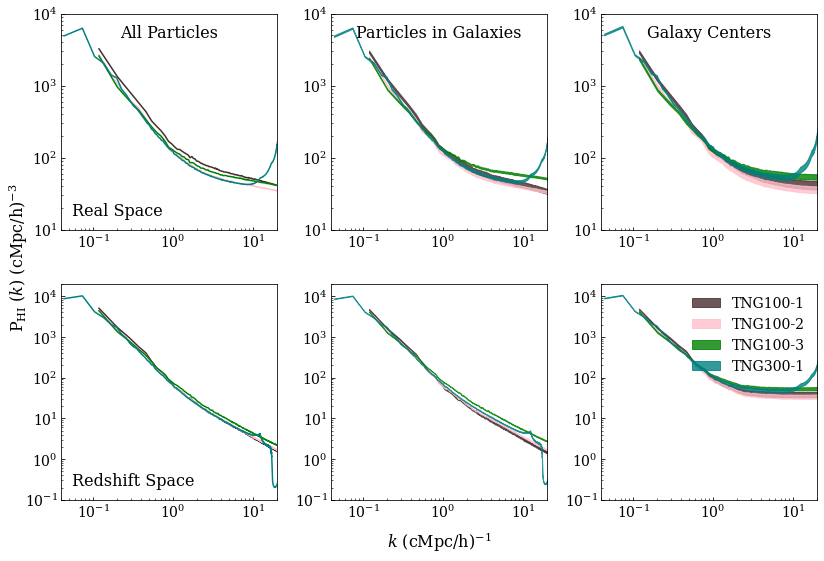

In [4]:
ip = {'is_auto':True, 'HI_fieldname':['vn', 'hiptl', 'hisubhalo'], 'simname':['tng100', 'tng300', 'tng100-2', 'tng100-3'],
     'snapshot':99, 'space':['real', 'redshift'], 'grid_resolution':800, 'path':['fiducial', 'low-2', 'low-3']}
fg = ds.figrid('simname', 'space', 'HI_fieldname', ip)
fg.autoFill(alpha = 0.8)
fg.setYLabel(pplib.pklab('HI'))
fg.axisArgs(ylim = (10, 1e4), slc = 'real')
fg.axisArgs(ylim = (.1, 2e4), slc = 'redshift')
fg.plot()

* <span style="color:red"> Not sure why the tng300-1 auto powers have that knee at the largest scale, that's pretty concerning </span>
* When looking strictly at the HI within galaxies, the match between the simulations is extremely good. TNG100-1 differs from the other two simulations though when using all particles - probably due to the filaments being more sensitive to the mass resolution definition? In any case, the difference is still small.
* The fact that TNG100-2 and TNG300-1 overlap a lot is a good sign that what we're looking at is mostly due to mass resolution.

## Galaxy Auto Powers

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red', 'resolved']


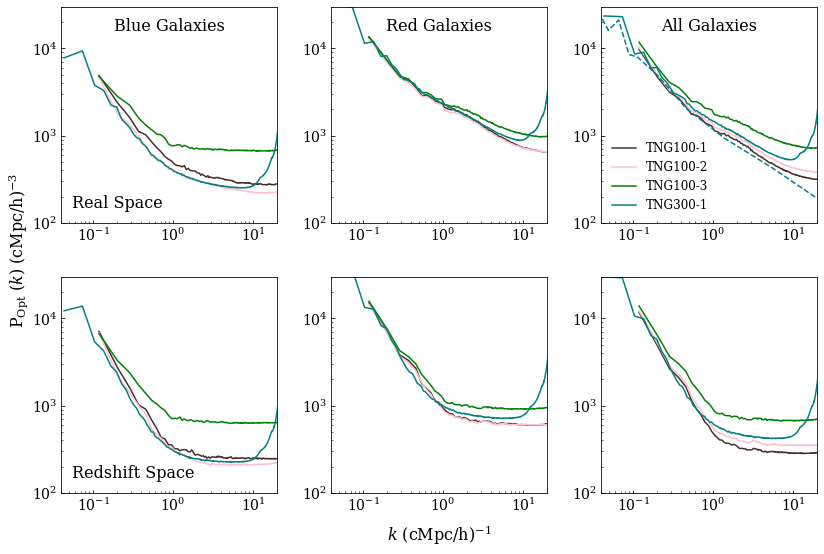

In [5]:
ip = {'is_auto':True, 'fieldname':'galaxy', 'simname':['tng100', 'tng300', 'tng100-2', 'tng100-3'],
     'snapshot':99, 'space':['real', 'redshift'], 'grid_resolution':800, 'path':['fiducial', 'low-2', 'low-3'],
     'gal_res':'diemer', 'color_cut':['0.60', 'None'], 'color':['blue', 'red', 'resolved']}
fg = ds.figrid('simname', 'space', 'color', ip)
fg.setYLabel(pplib.pklab("Opt"))
fg.legendArgs(slc = (0, 2), loc = 'lower left', fontsize = 12)
fg.axisArgs(ylim = (1e2, 3e4))
fg.plot()


import numpy as np
springel = np.genfromtxt('/Users/cosinga/code/hcolor/fig_md_analysis/stars_tng300.csv', delimiter = ',')

ax = fg.axes[0, 2]
ax.plot(springel[:, 0], springel[:, 1], color = 'teal', linestyle = 'dashed', label = 'Springel+18')

* Again, there's the weird knee at the largest scales of the box in all of the auto power spectra
* Similar otherwise to the HI comparison between the simulations with blue galaxies
* Red galaxies match extremely well across the board
* The all galaxies is probably affected due to the changing proportions of blue vs red

## Cross-Powers

The row values for space: ['real', 'redshift']
The column values for color: ['blue', 'red', 'resolved']


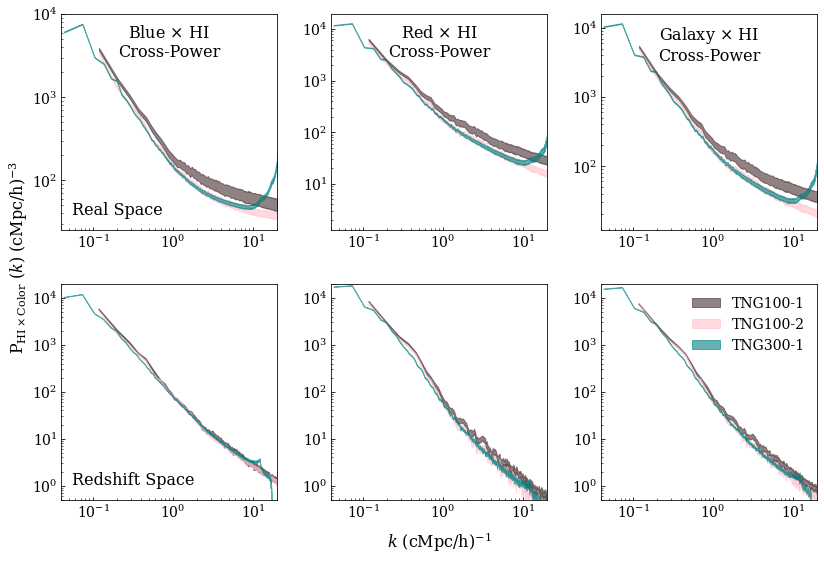

In [6]:
ds.displayAs('color', ['blue', 'red', 'resolved'], 
             ['Blue $\\times$ HI\nCross-Power', 'Red $\\times$ HI\nCross-Power', 'Galaxy $\\times$ HI\nCross-Power'])
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'simname':['tng100', 'tng100-2', 'tng300'], 
      'path':['fiducial', 'low-2'], 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':['real', 'redshift'],
     'snapshot':99}
fg = ds.figrid('simname', 'space', 'color', ip)
fg.autoFill(alpha = 0.6)
fg.setYLabel(pplib.pklab('HI', 'Color'))
fg.axisArgs(ylim = (.5, 2e4), slc = 'redshift')
fg.plot()

# Paper Figures

The row values for color: ['blue', 'red', 'resolved']
The column values for snapshot: [99]


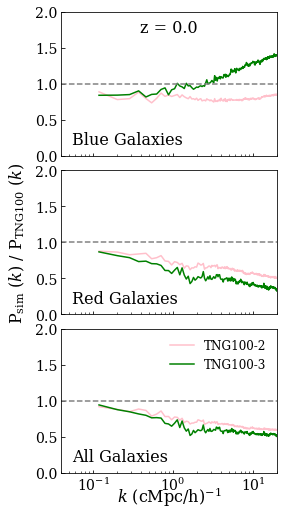

In [26]:
ip = {'is_auto':False, 'HI_fieldname':['vn','hiptl'], 
      'axis':0, 'grid_resolution':800, 
      'color_cut':['0.60', 'None'], 'gal_res':'diemer',
      'gal_species':'stmass', 'simname':['tng100', 'tng100-2', 'tng100-3'], 
      'path':['fiducial', 'low-2', 'low-3'], 'mas':'CICW', 'post_process':'no key found',
     'color':['blue', 'red', 'resolved'], 'space':'real',
     'snapshot':99}
fg = ds.figrid('simname', 'color', 'snapshot', ip)
fg.autoNorm({'simname':'tng100'})
fg.autoFill(alpha = 0.45)
fg.setFunc({'figrid_process':'fill'}, fill_mean)
fg.setPanelsize(3, 2)
fg.colLabels(['z = 0.0'])
fg.gspecArgs(hspace = 0.1)
fg.axisArgs(yscale = 'linear', ylim = (0,2))
fg.setYLabel(pplib.pkrat('sim','TNG100'))
fg.setDefaultTicksParams()
fg.legendArgs(loc = 'upper right', fontsize = 12)
fg.plotOnes()
fg.plot()
# fg.save('/Users/cosinga/code/hicolor_draft_two/figures/sim_tests.pdf', dpi = 150)
# fg.save('sim_tests.png', dpi = 150)

In [31]:
# interpolate the TNG300-1 plot
ip['simname'] = 'tng100'
ip['color'] = 'blue'
mylist = ds.getMatching(ip)
wvnms = mylist[0].getData()[0]
# print(wvnms)

pks = np.zeros((len(mylist), len(wvnms)))
mean_pks = np.mean(pks, axis = 0)


In [32]:
ip['simname'] = 'tng300'
tng300 = ds.getMatching(ip)
largwvnms = tng300[0].getData()[0]

lpks = np.zeros((len(tng300), len(largwvnms)))
lmean_pks = np.mean(lpks, axis = 0)

In [33]:
ks = []
diffs = []
ratpk = []
for i in range(len(largwvnms)):
    if largwvnms[i] > wvnms[0]:
        sk = np.argmin(abs(largwvnms[i] - wvnms))
        if wvnms[sk] < largwvnms[i]:
            diffs.append(abs(largwvnms[i] - wvnms[sk]))
            ks.append(wvnms[sk])
            ratpk.append()
    
    

[ 0.11866188  0.20105496  0.28597202  0.37115477  0.4580133   0.53971823
  0.62356222  0.70776335  0.79271499  0.87682998  0.95955105  1.04371479
  1.12938653  1.21291395  1.2961053   1.37968405  1.46343526  1.54739078
  1.63155956  1.71575635  1.7993344   1.88259941  1.96684477  2.05048677
  2.13421006  2.21865489  2.30292753  2.38635362  2.46980492  2.55307572
  2.63718649  2.72125031  2.8052524   2.88921295  2.97293371  3.0568267
  3.14018868  3.22388078  3.30780872  3.39132301  3.47511234  3.55900983
  3.64323112  3.72737291  3.81115506  3.8945017   3.97793313  4.06184352
  4.1457055   4.22955756  4.31358342  4.39755762  4.48156857  4.56493383
  4.64863759  4.73254882  4.81588925  4.89968945  4.98353039  5.06753871
  5.15138648  5.23485358  5.31901933  5.40276433  5.4865553   5.57041903
  5.65386753  5.73790092  5.82181141  5.90532824  5.98884589  6.0725522
  6.15684596  6.24085899  6.32464699  6.40847485  6.49202568  6.57559613
  6.65934233  6.74287874  6.82656533  6.9108348   6.9

In [34]:
print(largwvnms)

[ 0.04341288  0.07355669  0.10462391  0.13578833  0.16756584  0.19745789
  0.22813252  0.25893781  0.29001768  0.32079145  0.35105526  0.38184687
  0.41319019  0.44374901  0.47418487  0.50476246  0.53540314  0.56611858
  0.59691203  0.62771574  0.65829307  0.68875588  0.71957735  0.75017809
  0.78080856  0.81170301  0.84253446  0.8730562   0.90358717  0.93405209
  0.96482433  0.99557938  1.02631185  1.05702913  1.08765867  1.11835123
  1.14884952  1.17946858  1.21017392  1.24072793  1.27138256  1.30207677
  1.33288944  1.36367301  1.39432502  1.42481769  1.45534139  1.48604031
  1.51672153  1.54739911  1.57814028  1.60886255  1.63959826  1.67009774
  1.70072107  1.7314203   1.7619107   1.79256931  1.82324283  1.85397758
  1.88465359  1.91519033  1.94598268  1.97662109  2.00727633  2.03795818
  2.06848812  2.09923204  2.12993101  2.16048594  2.19104118  2.22166544
  2.25250462  2.28324109  2.31389524  2.34456397  2.37513135  2.4057059
  2.43634475  2.46690685  2.4975239   2.52835419  2.